In [22]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from turtle import color
from sklearn.linear_model import LinearRegression


In [23]:
data = pd.read_csv("SharedRoom.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.2                                  6 non-null      int64  
 1   Unnamed: 0.1                                  6 non-null      int64  
 2   name                                          6 non-null      object 
 3   description                                   6 non-null      object 
 4   neighborhood_overview                         6 non-null      object 
 5   host_name                                     6 non-null      object 
 6   host_location                                 6 non-null      object 
 7   host_response_time                            6 non-null      object 
 8   host_response_rate                            6 non-null      object 
 9   host_acceptance_rate                          6 non-null      float64

In [24]:
# Elimino las columnas que no voy a utilizar
colums = ['room_type',
'price',
'host_response_rate',
'host_is_superhost',
'host_acceptance_rate',
'bathrooms_text',
'review_scores_cleanliness',
'host_identity_verified',
'instant_bookable',
'property_type']

data = data[colums]

In [25]:
data = data.copy()
data_2 = data.copy()
data_3= data.copy()
data_4 = data.copy()
data_5 = data.copy()
data_6 = data.copy()

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

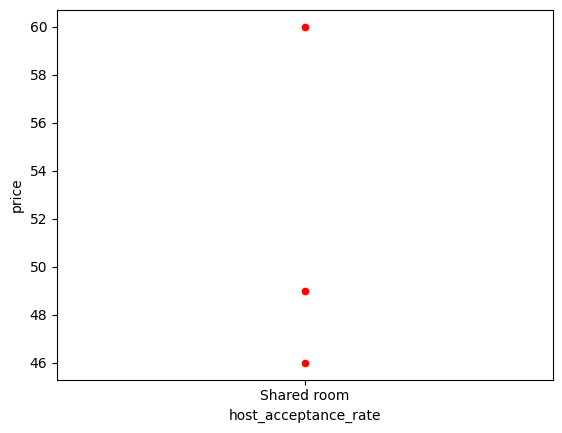

In [26]:
#imprimimos el scarlert plot entre la variable dependiente (total) e independiente (alcohol)
#Dependiente es la que se quiere predecir y la independiente es aquella que puede aportar información para hacer un análisis 


sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=data)
sns.scatterplot(x='room_type', y='price', color='red', data=data)


In [27]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data[['host_acceptance_rate']]
Var_Dep = data['price']


In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [29]:
type(model)

sklearn.linear_model._base.LinearRegression

In [30]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [31]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.14701887]),
 'rank_': 1,
 'singular_': array([74.30231042]),
 'intercept_': 60.01207547169812}

In [32]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.9999747022240961

In [33]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([60.01207547, 48.98566038, 48.98566038, 48.98566038, 48.98566038,
       46.04528302])

In [34]:
#Se inserta la columna "Predicciones" al dataframe
data.insert(0, 'Predicciones',y_pred)
data

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,60.012075,Shared room,60.0,0%,0.0,0.0,1 shared bath,4.762193,1.0,0.0,Shared room in tiny home
1,48.985660,Shared room,49.0,8%,0.0,75.0,1 shared bath,5.000000,1.0,0.0,Shared room in guesthouse
2,48.985660,Shared room,49.0,8%,0.0,75.0,1 shared bath,4.000000,1.0,0.0,Shared room in guesthouse
3,48.985660,Shared room,49.0,8%,0.0,75.0,1 shared bath,4.762193,1.0,0.0,Shared room in guesthouse
4,48.985660,Shared room,49.0,8%,0.0,75.0,1 shared bath,5.000000,1.0,0.0,Shared room in guesthouse
5,46.045283,Shared room,46.0,100%,0.0,95.0,1 shared bath,5.000000,1.0,0.0,Shared room in home


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

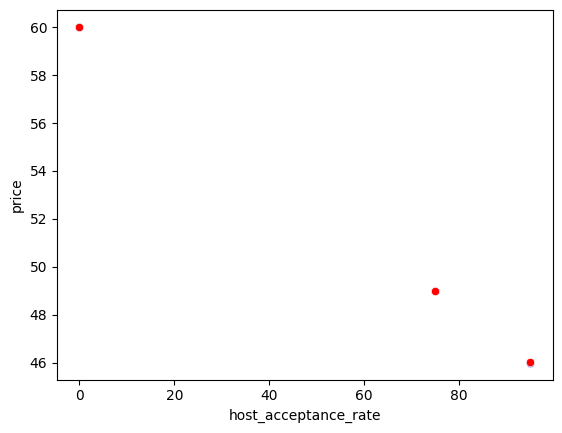

In [35]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=data)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [36]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.9999747022240961

In [37]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9999873510320498

In [38]:
#Eliminamos columna de tipo string
data1=data.drop(data.select_dtypes(include=['object']).columns, axis=1)


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

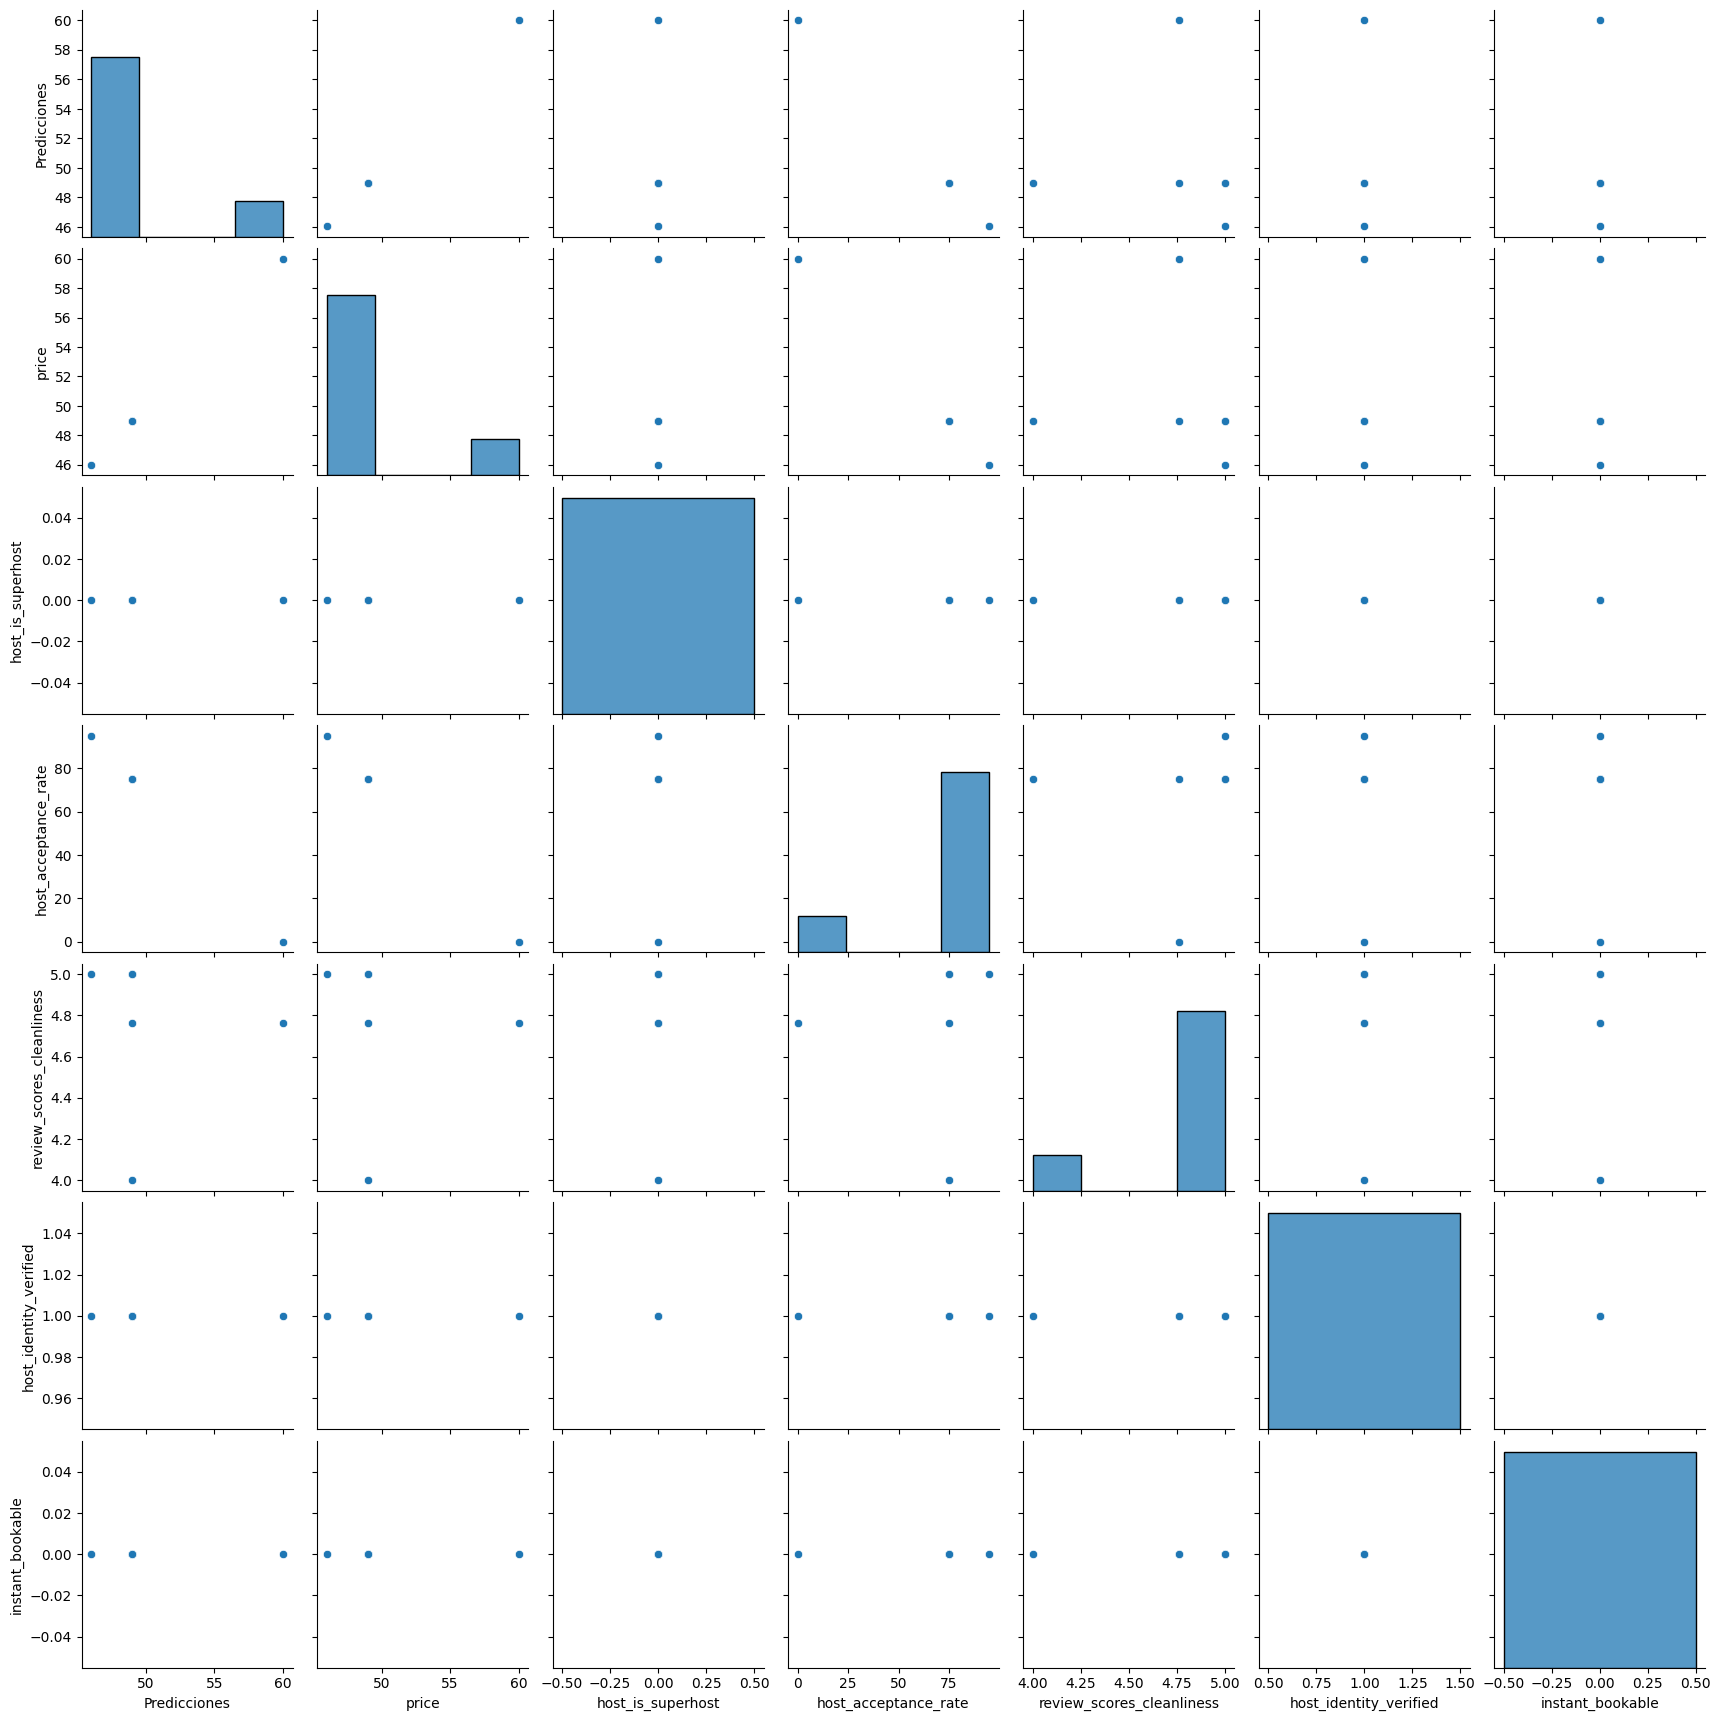

In [39]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data1)

In [40]:
#Correlaci9ones entre variables
Corr_Factors=data1.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.999987,NaN,-1.000000,-0.066957,NaN,NaN
price,0.999987,1.000000,NaN,-0.999987,-0.068528,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,-1.000000,-0.999987,NaN,1.000000,0.066957,NaN,NaN
review_scores_cleanliness,-0.066957,-0.068528,NaN,0.066957,1.000000,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.999987,NaN,1.000000,0.066957,NaN,NaN
price,0.999987,1.000000,NaN,0.999987,0.068528,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,1.000000,0.999987,NaN,1.000000,0.066957,NaN,NaN
review_scores_cleanliness,0.066957,0.068528,NaN,0.066957,1.000000,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

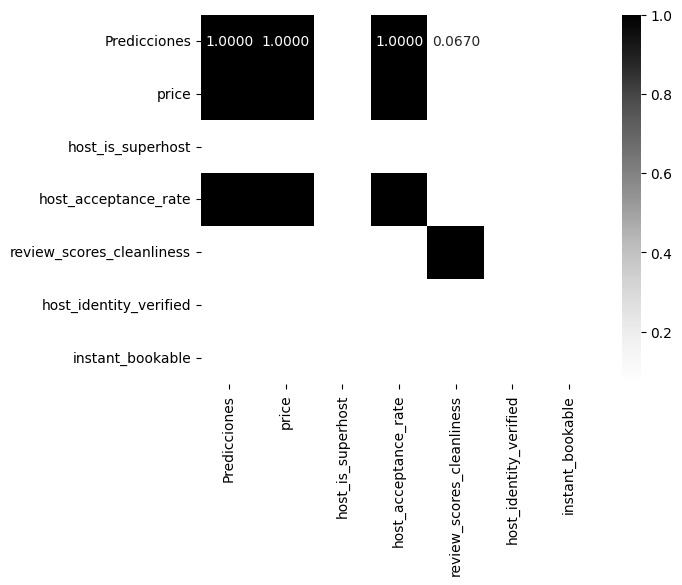

In [42]:
sns.heatmap(Corr_Factors1, cmap = "Grays", annot = True, fmt = ".4f")

**REGRESIÓN PRICE VS HOST_IS_SUPERHOST**

<Axes: xlabel='host_is_superhost', ylabel='price'>

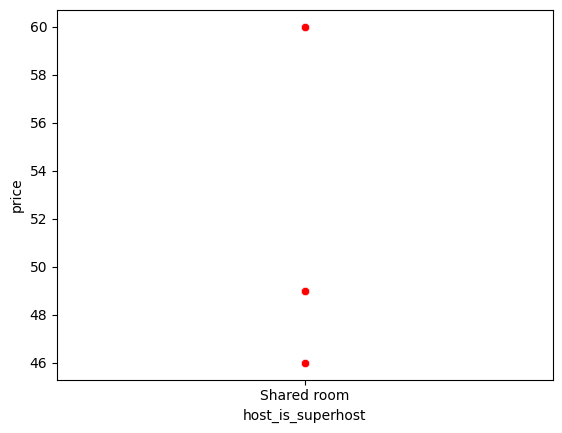

In [43]:
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=data_2)
sns.scatterplot(x='room_type', y='price', color='red', data=data_2)

In [44]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_2[['host_is_superhost']]
Var_Dep = data_2['price']

In [45]:
model=LinearRegression()

In [46]:
#verificamos la función relacoanda al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [47]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [48]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': 50.333333333333336}

**modelo matemático**

In [49]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0

In [50]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([50.33333333, 50.33333333, 50.33333333, 50.33333333, 50.33333333,
       50.33333333])

In [51]:
#Se inserta la columna "Predicciones" al dataframe
data_2.insert(0, 'Predicciones',y_pred)
data_2

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,50.333333,Shared room,60.0,0%,0.0,0.0,1 shared bath,4.762193,1.0,0.0,Shared room in tiny home
1,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,5.000000,1.0,0.0,Shared room in guesthouse
2,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,4.000000,1.0,0.0,Shared room in guesthouse
3,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,4.762193,1.0,0.0,Shared room in guesthouse
4,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,5.000000,1.0,0.0,Shared room in guesthouse
5,50.333333,Shared room,46.0,100%,0.0,95.0,1 shared bath,5.000000,1.0,0.0,Shared room in home


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='host_is_superhost', ylabel='price'>

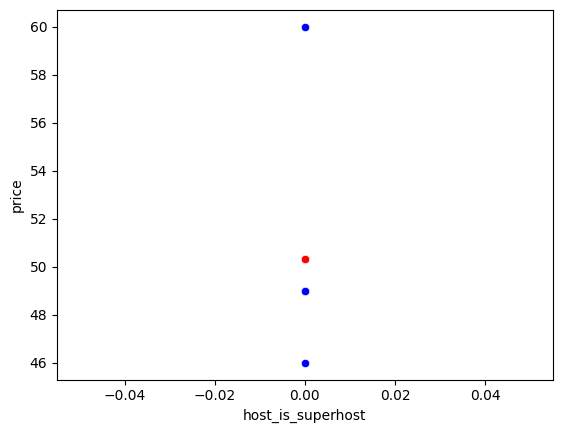

In [52]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=data_2)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=data_2)
sns.lineplot(x='host_is_superhost', y='Predicciones', color="green", data=data_2)

In [53]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0

In [54]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0

In [55]:
#Eliminamos columna de tipo string
data2=data_2.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

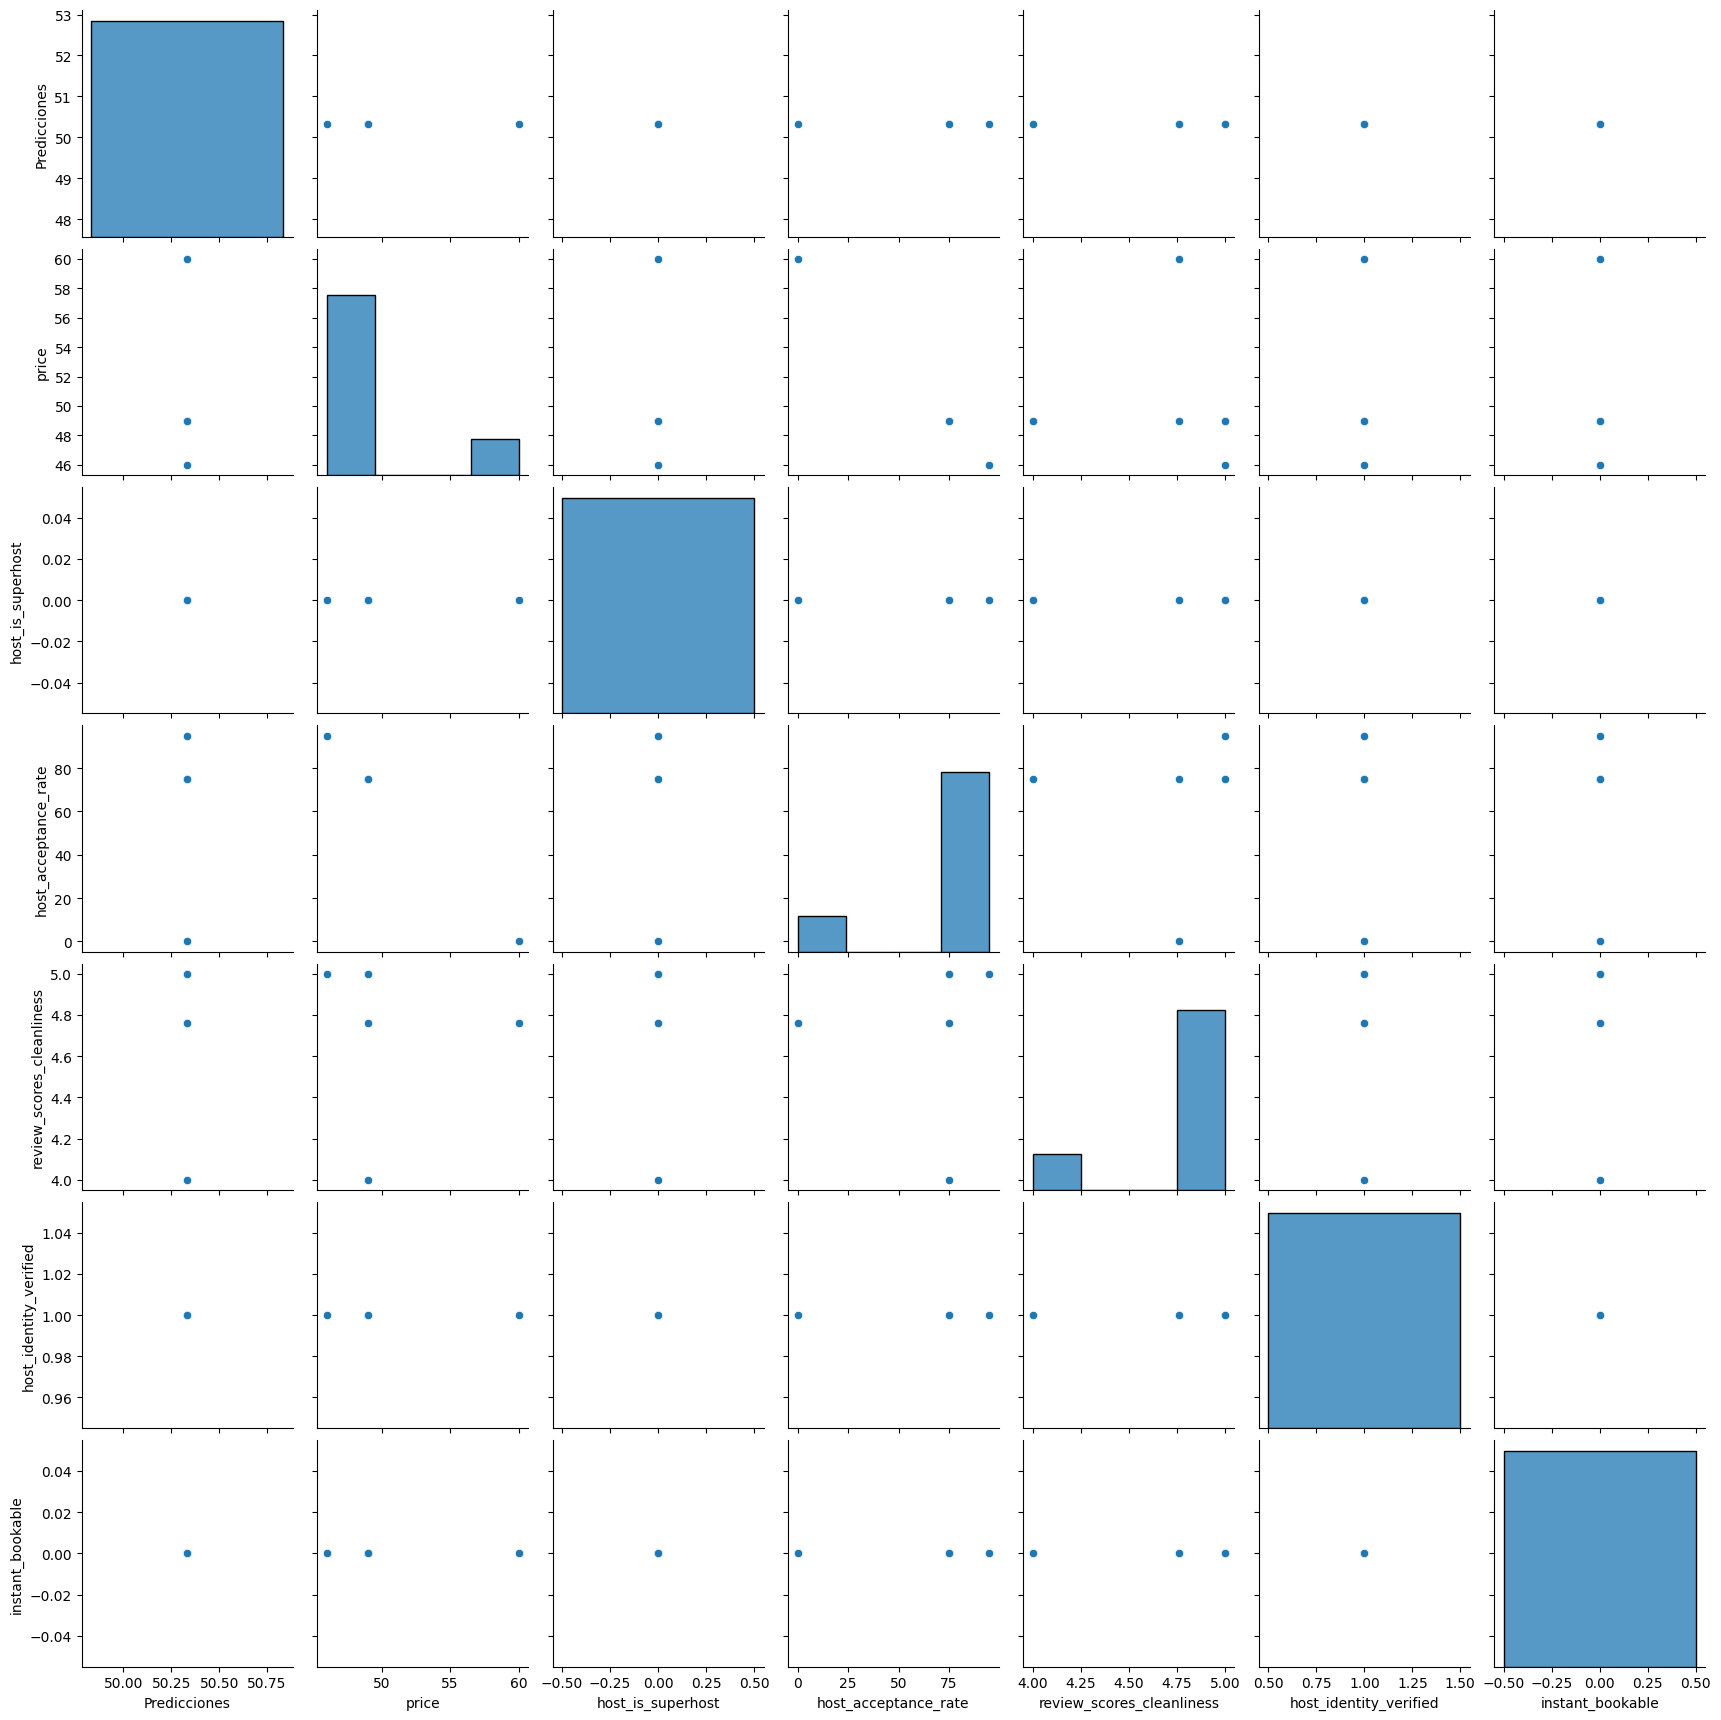

In [56]:
sns.pairplot(data2)

In [57]:
#Correlaci9ones entre variables
Corr_Factors=data2.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,NaN,-0.999987,-0.068528,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,-0.999987,NaN,1.000000,0.066957,NaN,NaN
review_scores_cleanliness,NaN,-0.068528,NaN,0.066957,1.000000,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,NaN,0.999987,0.068528,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,0.999987,NaN,1.000000,0.066957,NaN,NaN
review_scores_cleanliness,NaN,0.068528,NaN,0.066957,1.000000,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

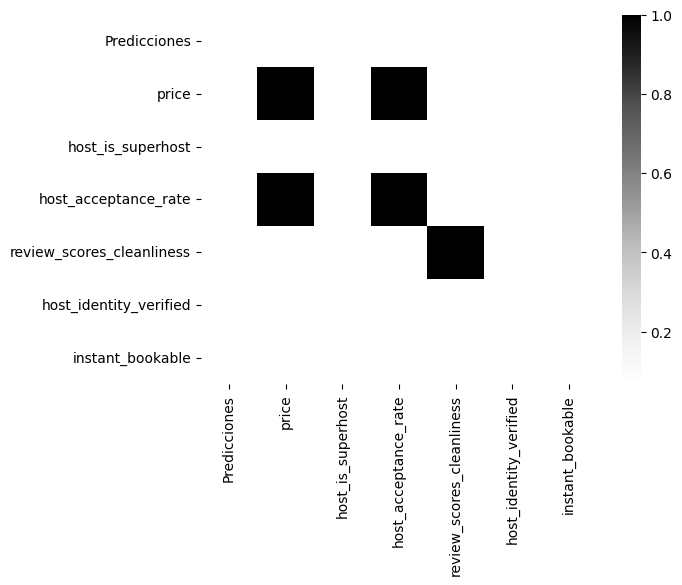

In [59]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

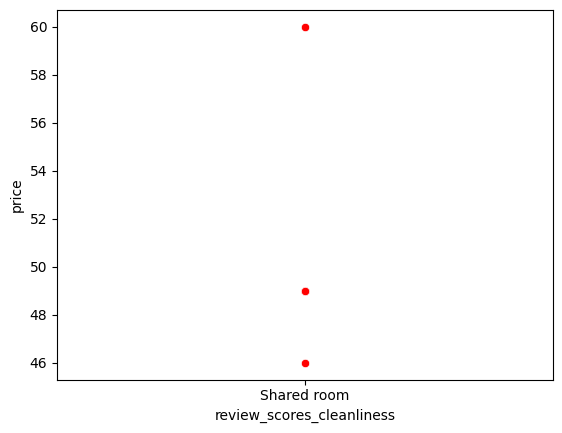

In [60]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=data)
sns.scatterplot(x='room_type', y='price', color='red', data=data_3)

In [61]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_3[['review_scores_cleanliness']]
Var_Dep = data_3['price']

In [62]:
model=LinearRegression()

In [63]:
type(model)

sklearn.linear_model._base.LinearRegression

In [64]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [65]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.8642944]),
 'rank_': 1,
 'singular_': array([0.86613984]),
 'intercept_': 54.442244496420855}

**modelo matemático**

In [66]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0046961034732837525

In [67]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([50.3263078, 50.1207725, 50.9850669, 50.3263078, 50.1207725,
       50.1207725])

In [68]:
#Se inserta la columna "Predicciones" al dataframe
data_3.insert(0, 'Predicciones',y_pred)
data_3

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,50.326308,Shared room,60.0,0%,0.0,0.0,1 shared bath,4.762193,1.0,0.0,Shared room in tiny home
1,50.120772,Shared room,49.0,8%,0.0,75.0,1 shared bath,5.000000,1.0,0.0,Shared room in guesthouse
2,50.985067,Shared room,49.0,8%,0.0,75.0,1 shared bath,4.000000,1.0,0.0,Shared room in guesthouse
3,50.326308,Shared room,49.0,8%,0.0,75.0,1 shared bath,4.762193,1.0,0.0,Shared room in guesthouse
4,50.120772,Shared room,49.0,8%,0.0,75.0,1 shared bath,5.000000,1.0,0.0,Shared room in guesthouse
5,50.120772,Shared room,46.0,100%,0.0,95.0,1 shared bath,5.000000,1.0,0.0,Shared room in home


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

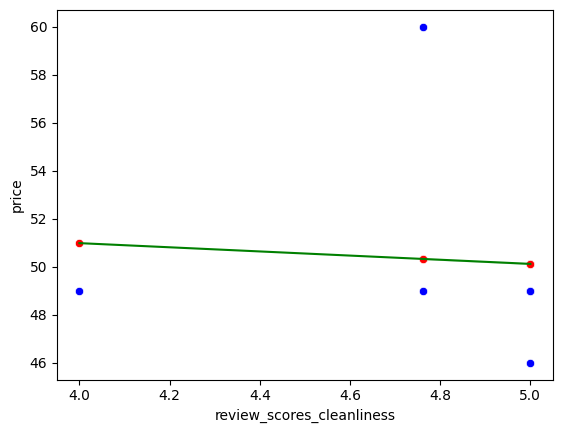

In [69]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=data_3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=data_3)
sns.lineplot(x='review_scores_cleanliness', y='Predicciones', color="green", data=data_3)

In [70]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0046961034732837525

In [71]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.06852812176970673

In [72]:
#Eliminamos columna de tipo string
data3=data_3.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

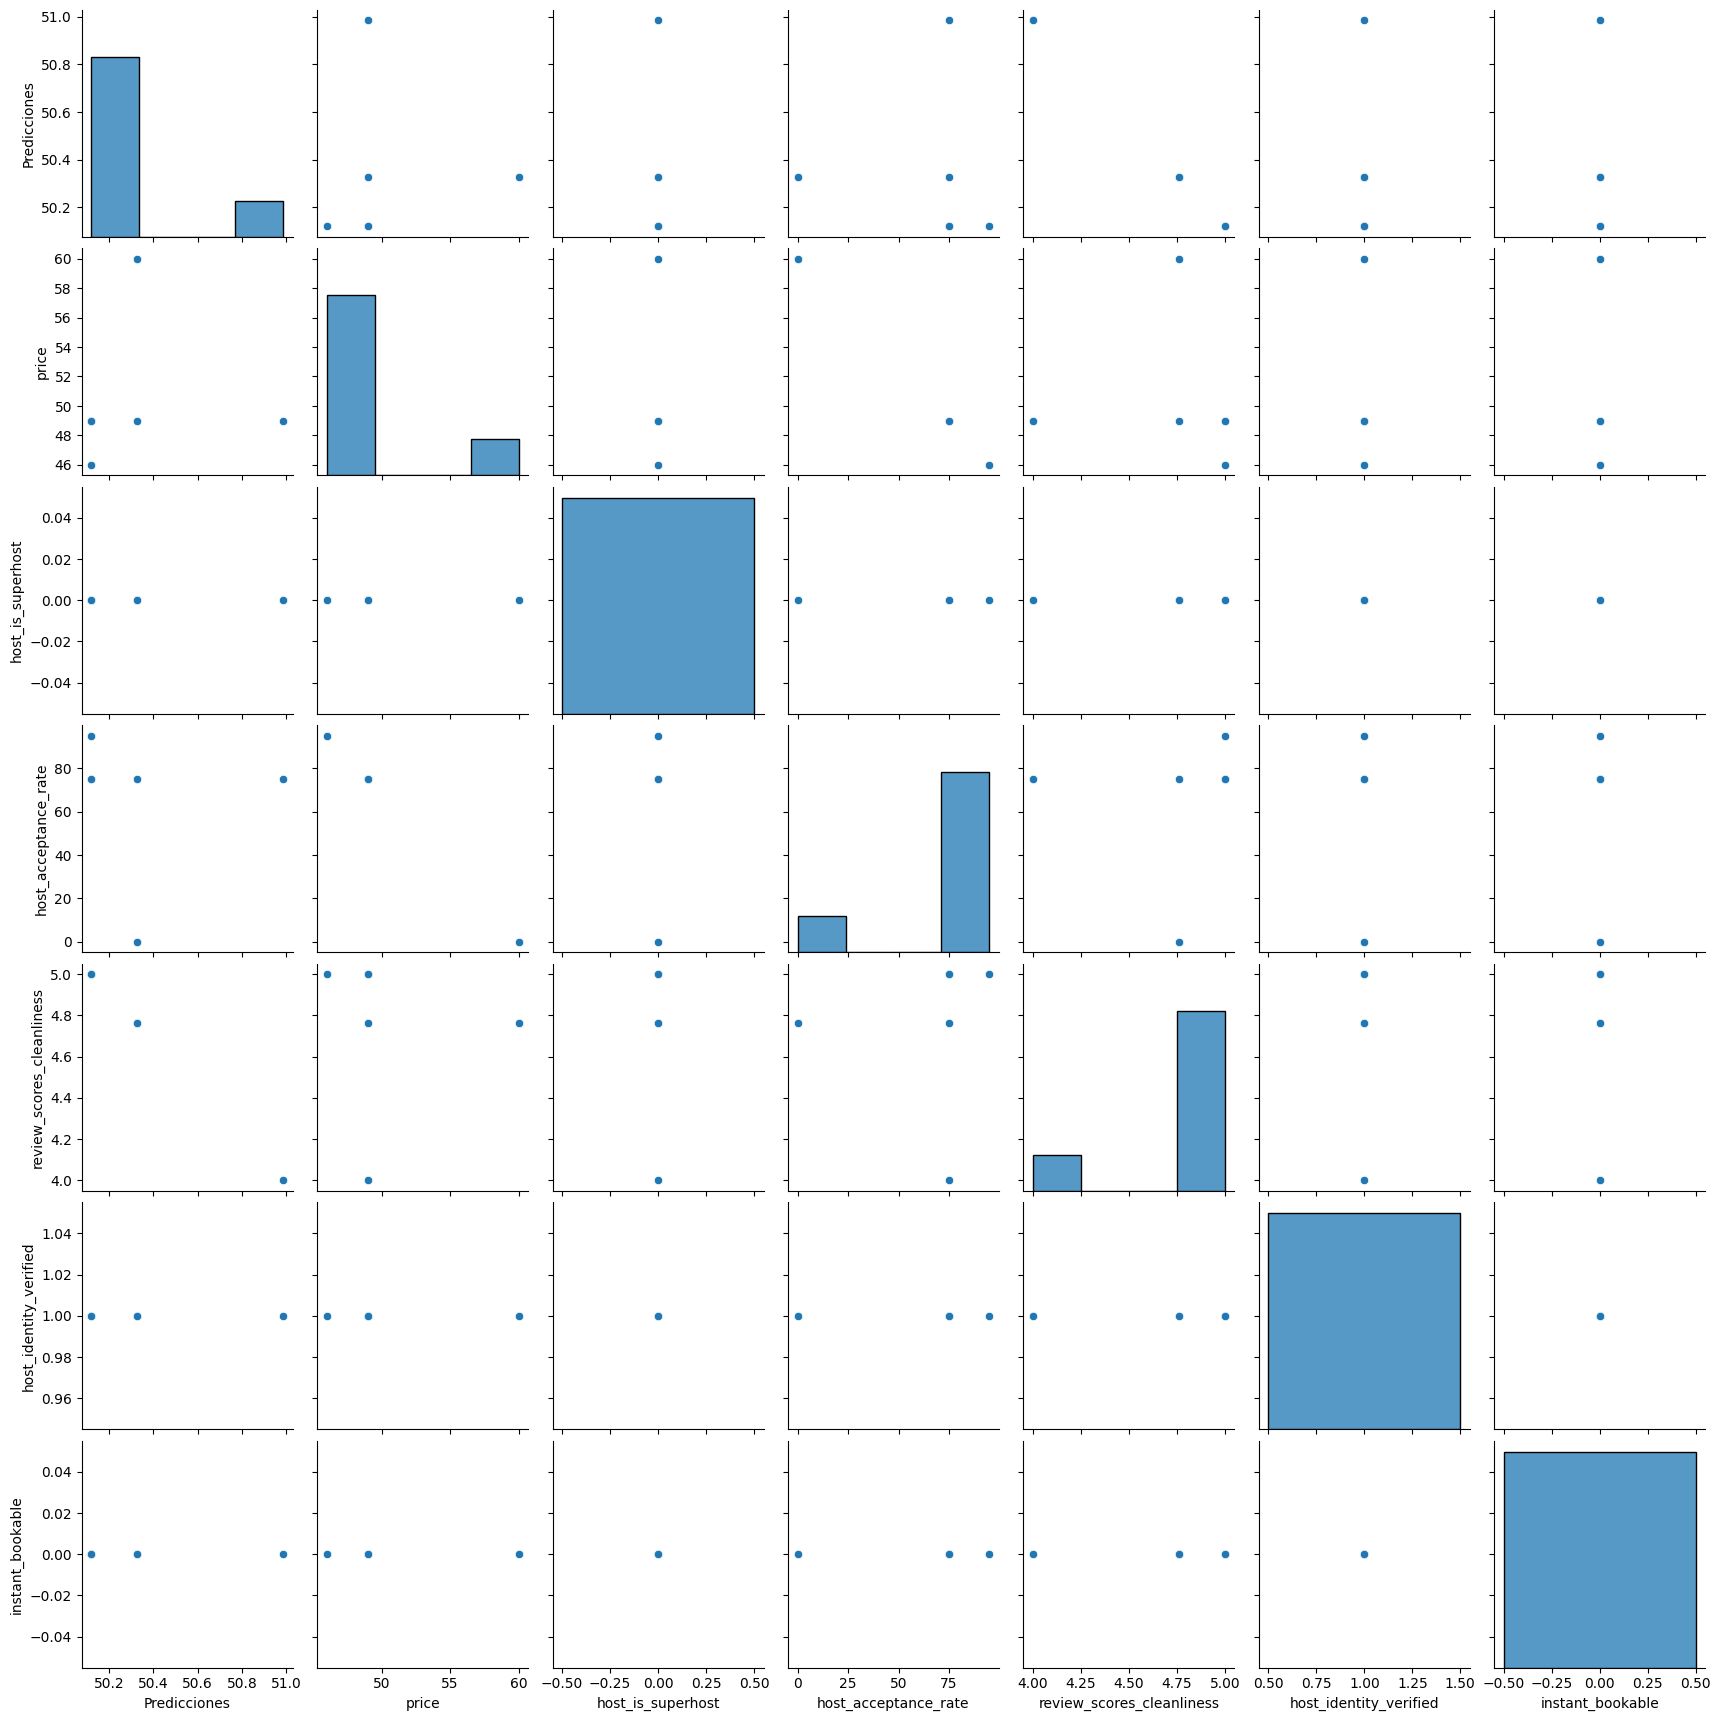

In [73]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data3)

In [74]:
#Correlaci9ones entre variables
Corr_Factors=data3.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.068528,NaN,-0.066957,-1.000000,NaN,NaN
price,0.068528,1.000000,NaN,-0.999987,-0.068528,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,-0.066957,-0.999987,NaN,1.000000,0.066957,NaN,NaN
review_scores_cleanliness,-1.000000,-0.068528,NaN,0.066957,1.000000,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,1.000000,0.068528,NaN,0.066957,1.000000,NaN,NaN
price,0.068528,1.000000,NaN,0.999987,0.068528,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,0.066957,0.999987,NaN,1.000000,0.066957,NaN,NaN
review_scores_cleanliness,1.000000,0.068528,NaN,0.066957,1.000000,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

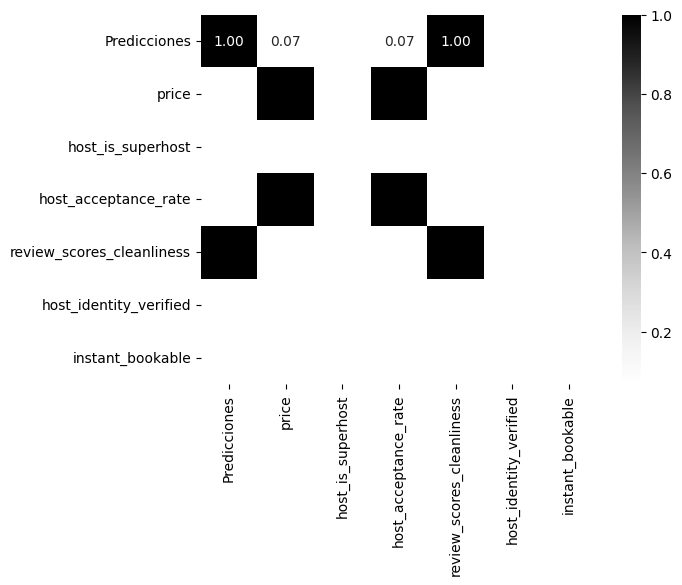

In [76]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs host_identity_verified**

<Axes: xlabel='host_identity_verified', ylabel='price'>

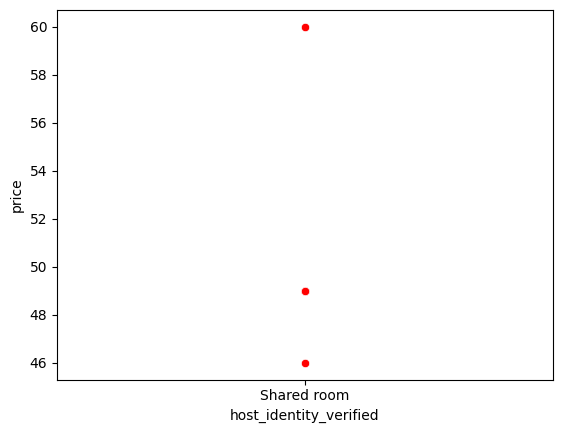

In [77]:
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=data_4)
sns.scatterplot(x='room_type', y='price', color='red', data=data_4)

In [78]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_3[['host_identity_verified']]
Var_Dep = data_3['price']

In [79]:
model=LinearRegression()

In [80]:
type(model)

sklearn.linear_model._base.LinearRegression

In [81]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [82]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': 50.333333333333336}

**modelo matemático**

In [83]:
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0

In [84]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([50.33333333, 50.33333333, 50.33333333, 50.33333333, 50.33333333,
       50.33333333])

In [85]:
#Se inserta la columna "Predicciones" al dataframe
data_4.insert(0, 'Predicciones',y_pred)
data_4

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,50.333333,Shared room,60.0,0%,0.0,0.0,1 shared bath,4.762193,1.0,0.0,Shared room in tiny home
1,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,5.000000,1.0,0.0,Shared room in guesthouse
2,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,4.000000,1.0,0.0,Shared room in guesthouse
3,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,4.762193,1.0,0.0,Shared room in guesthouse
4,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,5.000000,1.0,0.0,Shared room in guesthouse
5,50.333333,Shared room,46.0,100%,0.0,95.0,1 shared bath,5.000000,1.0,0.0,Shared room in home


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='host_identity_verified', ylabel='price'>

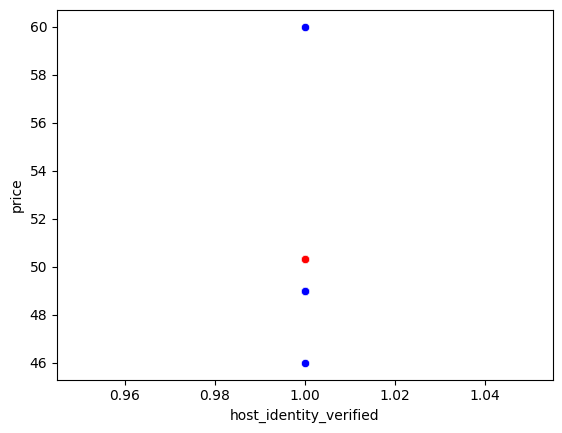

In [86]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=data_4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=data_4)
sns.lineplot(x='host_identity_verified', y='Predicciones', color="green", data=data_4)


In [87]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0

In [88]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0

In [89]:
#Eliminamos columna de tipo string
data4=data_4.drop(data.select_dtypes(include=['object']).columns, axis=1)


In [90]:
#Correlaci9ones entre variables
Corr_Factors=data4.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,NaN,-0.999987,-0.068528,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,-0.999987,NaN,1.000000,0.066957,NaN,NaN
review_scores_cleanliness,NaN,-0.068528,NaN,0.066957,1.000000,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,NaN,0.999987,0.068528,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,0.999987,NaN,1.000000,0.066957,NaN,NaN
review_scores_cleanliness,NaN,0.068528,NaN,0.066957,1.000000,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

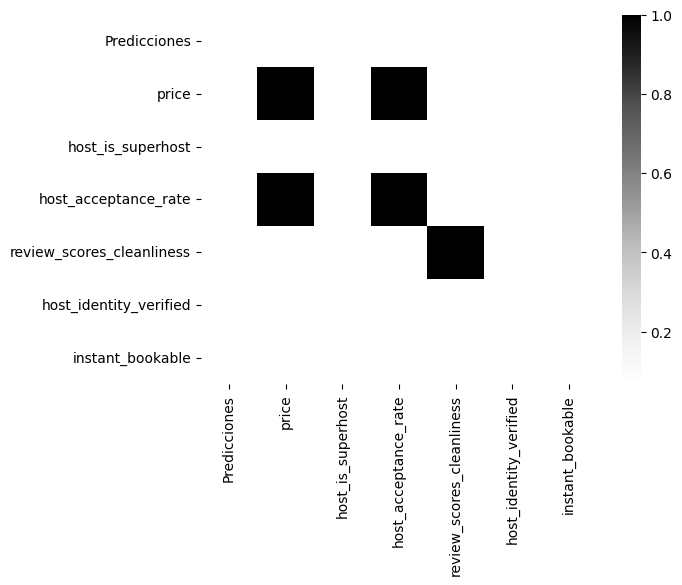

In [92]:
#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs instant_bookable**

<Axes: xlabel='instant_bookable', ylabel='price'>

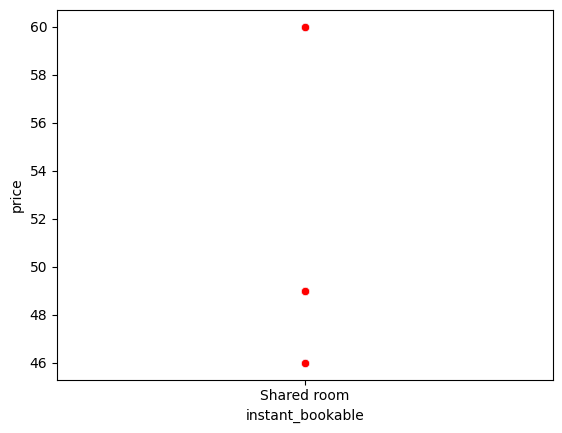

In [93]:
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=data_5)
sns.scatterplot(x='room_type', y='price', color='red', data=data_5)

In [94]:
#Declaraqmos las variables dependientes e independiente para la regr4esión lineal 

#Vars_Indep = df[['alcohol], ['speeding]]
Vars_Indep = data_5[['instant_bookable']]
Var_Dep = data_5['price']

In [95]:
model=LinearRegression()

type(model)

sklearn.linear_model._base.LinearRegression

In [96]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [97]:
#Verificamos los coeficientes obtenidos para elmodelo ajustado
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': 50.333333333333336}

In [98]:
# **modelo matematico**
#Evaluación de la eficiencia del modelo obteniudo por medio del coeficiente R determinación
model.score(Vars_Indep, Var_Dep)

0.0

In [99]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol"
#y_pred = model.predict(X=df[['alcohol'], ['speeding']])
y_pred = model.predict(X = Vars_Indep)
y_pred

array([50.33333333, 50.33333333, 50.33333333, 50.33333333, 50.33333333,
       50.33333333])

In [111]:
#Se inserta la columna "Predicciones" al dataframe
data_5.insert(0, 'Predicciones',y_pred)
data_5

,Predicciones,room_type,price,host_response_rate,host_is_superhost,host_acceptance_rate,bathrooms_text,review_scores_cleanliness,host_identity_verified,instant_bookable,property_type
0,50.333333,Shared room,60.0,0%,0.0,0.0,1 shared bath,4.762193,1.0,0.0,Shared room in tiny home
1,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,5.000000,1.0,0.0,Shared room in guesthouse
2,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,4.000000,1.0,0.0,Shared room in guesthouse
3,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,4.762193,1.0,0.0,Shared room in guesthouse
4,50.333333,Shared room,49.0,8%,0.0,75.0,1 shared bath,5.000000,1.0,0.0,Shared room in guesthouse
5,50.333333,Shared room,46.0,100%,0.0,95.0,1 shared bath,5.000000,1.0,0.0,Shared room in home


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='instant_bookable', ylabel='price'>

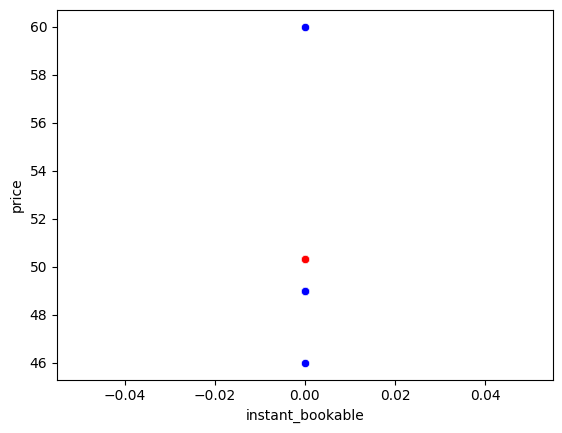

In [112]:
#visualizamos la gráfica comparativa entre el total real y el total predicto
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=data_5)
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=data_5)
sns.lineplot(x='instant_bookable', y='Predicciones', color="green", data=data_5)

In [113]:
#Corroboramos cual es el coeficiente de Determinción de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0

In [114]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0

In [115]:
#Eliminamos columna de tipo string
data5=data_5.drop(data.select_dtypes(include=['object']).columns, axis=1)

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

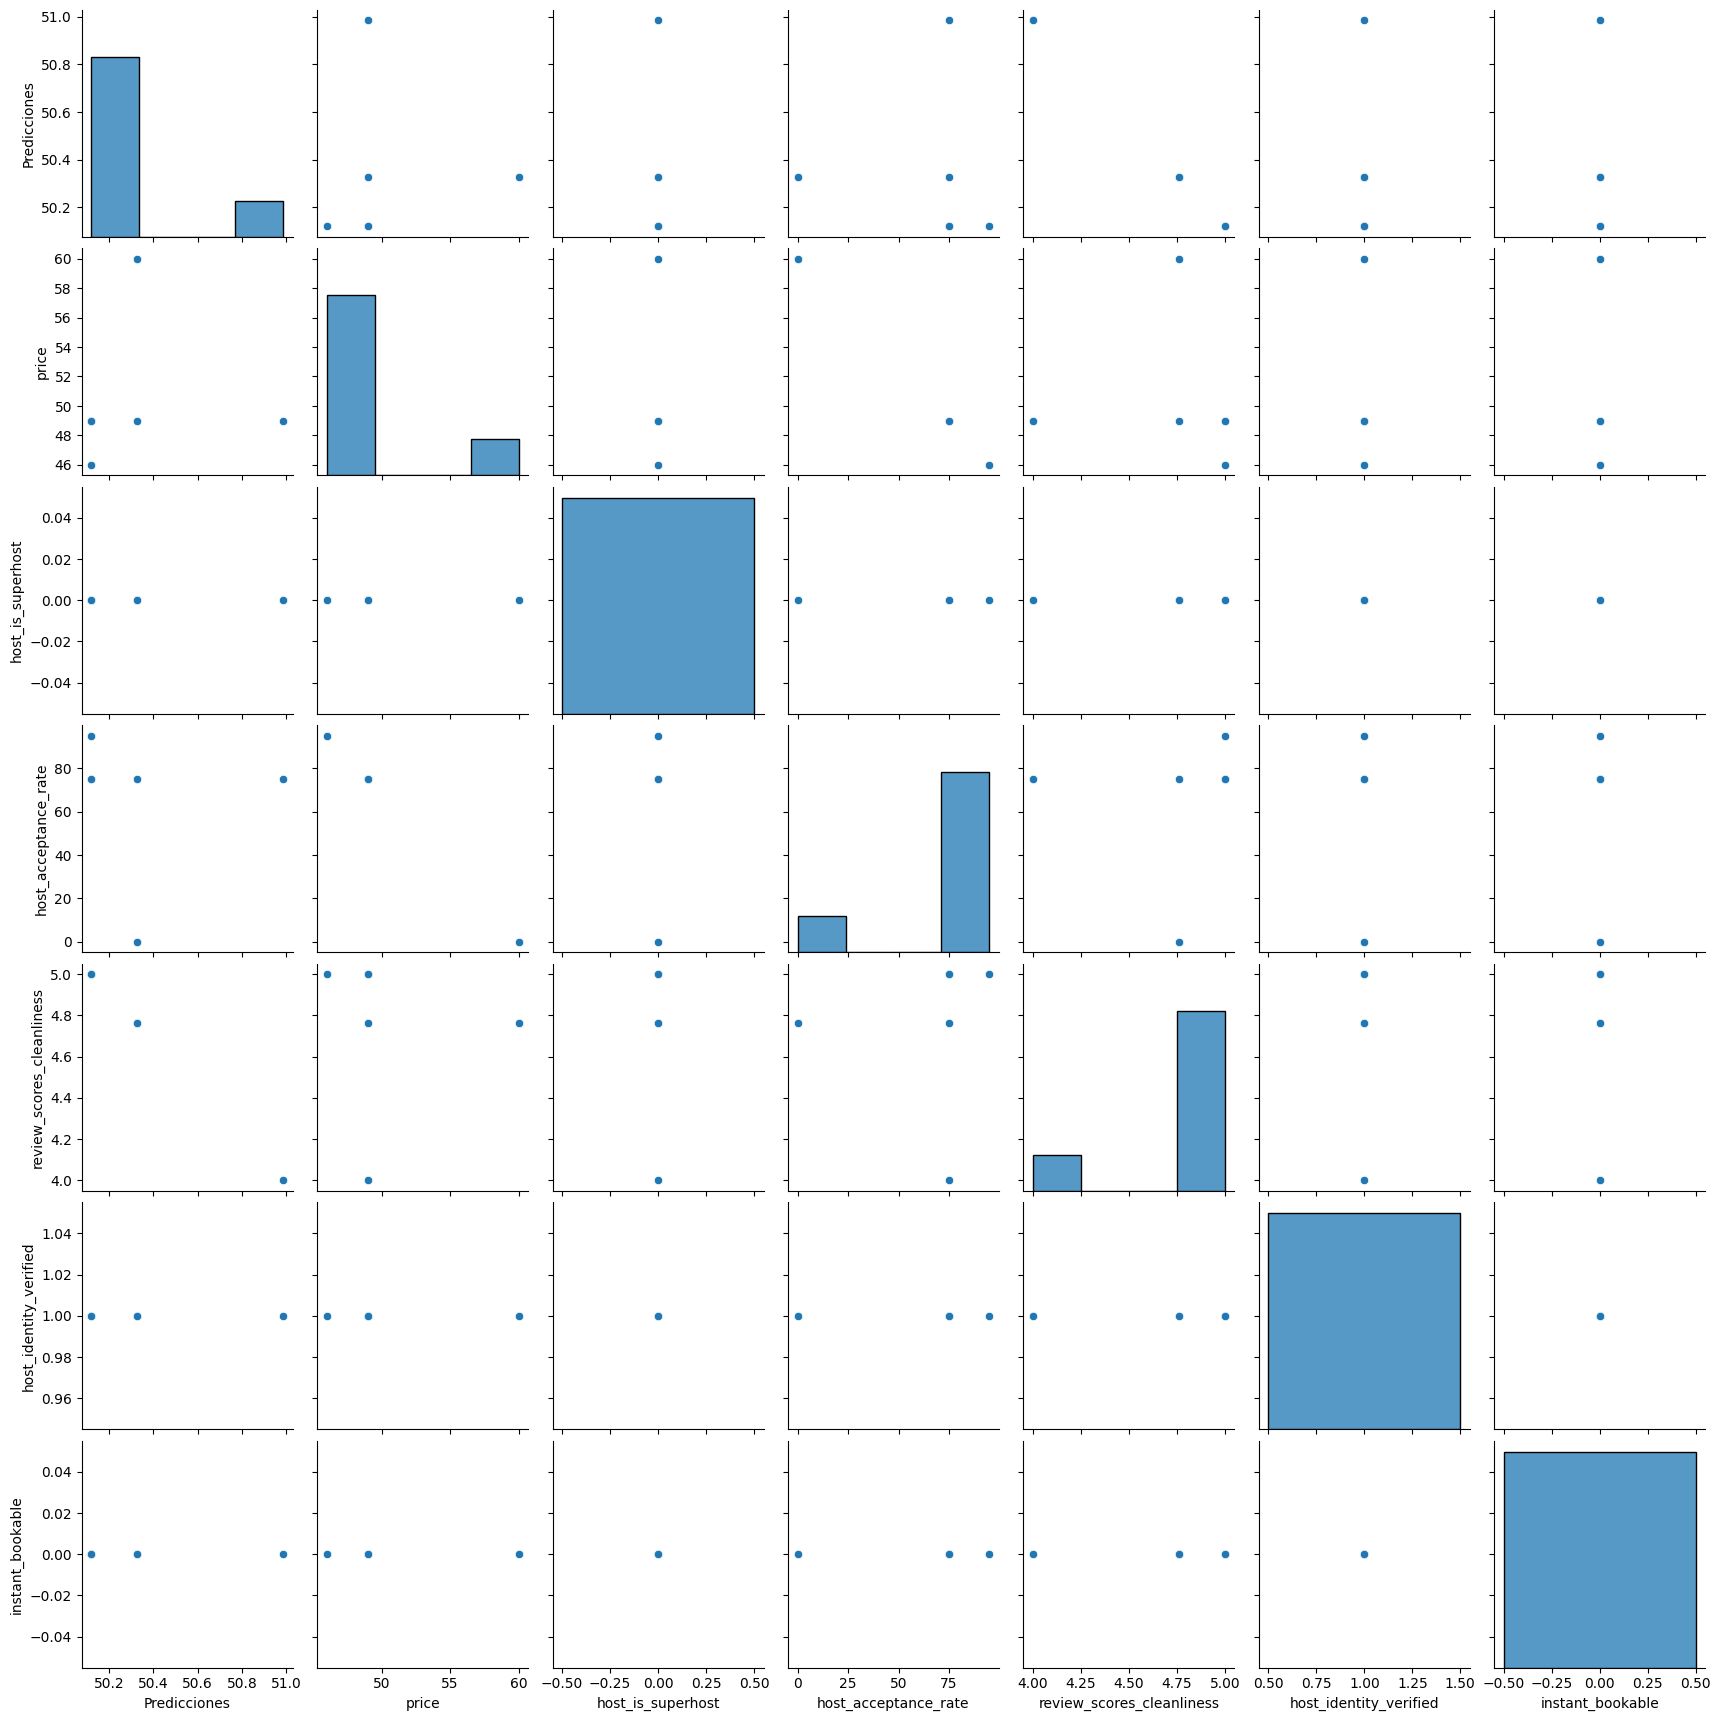

In [116]:
#Graficamos todas laas dispersones entre todas las variables
sns.pairplot(data3)

In [117]:
#Correlaci9ones entre variables
Corr_Factors=data5.corr()
Corr_Factors

,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,NaN,-0.999987,-0.068528,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,-0.999987,NaN,1.000000,0.066957,NaN,NaN
review_scores_cleanliness,NaN,-0.068528,NaN,0.066957,1.000000,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
#Encotramos el valor absoluto de todas las correlaciones entres ls variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1


,Predicciones,price,host_is_superhost,host_acceptance_rate,review_scores_cleanliness,host_identity_verified,instant_bookable
Predicciones,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,NaN,0.999987,0.068528,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,0.999987,NaN,1.000000,0.066957,NaN,NaN
review_scores_cleanliness,NaN,0.068528,NaN,0.066957,1.000000,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

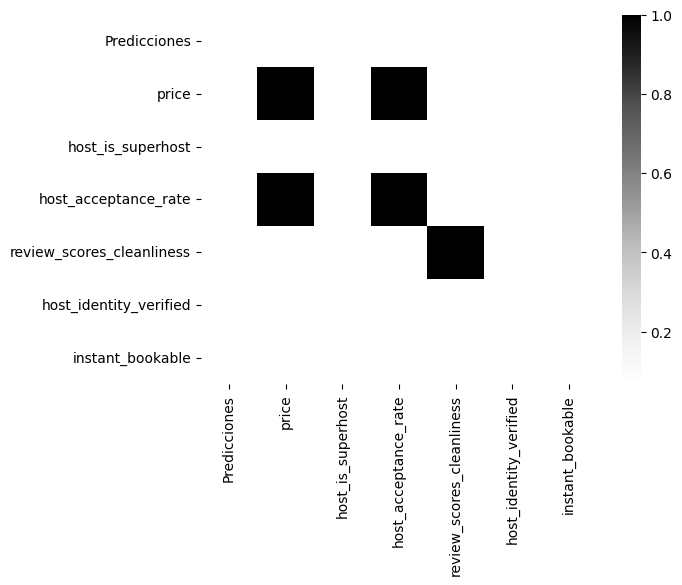

In [119]:

#Graficamos mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap= 'Greys', annot = True, fmt=".2f")
Heat_Map

**price vs property_type**